In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('/kaggle/input/crop-price-prediction-dataset/Crop_Yield_Prediction.csv')

In [3]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


In [4]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [5]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [6]:
df.shape

(2200, 9)

In [7]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'Yield'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [11]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [12]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
Yield           502
dtype: int64

In [13]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64

In [15]:
crop_summary=pd.pivot_table(df,index=['Crop'],aggfunc='mean')

In [16]:
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [17]:
crop_summary_new=crop_summary.reset_index()
crop_summary_new

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


In [18]:
df1=df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]

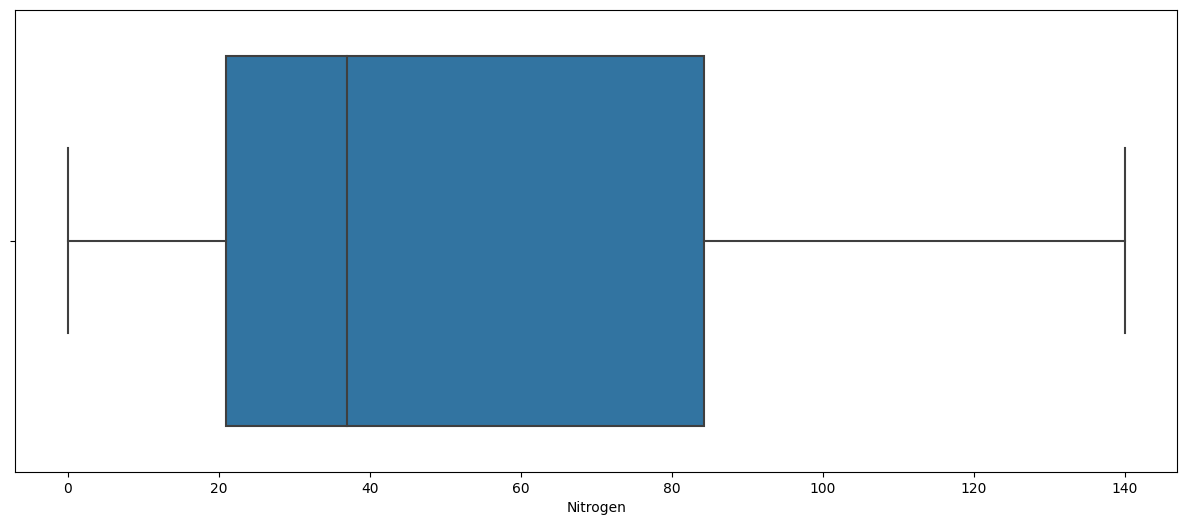

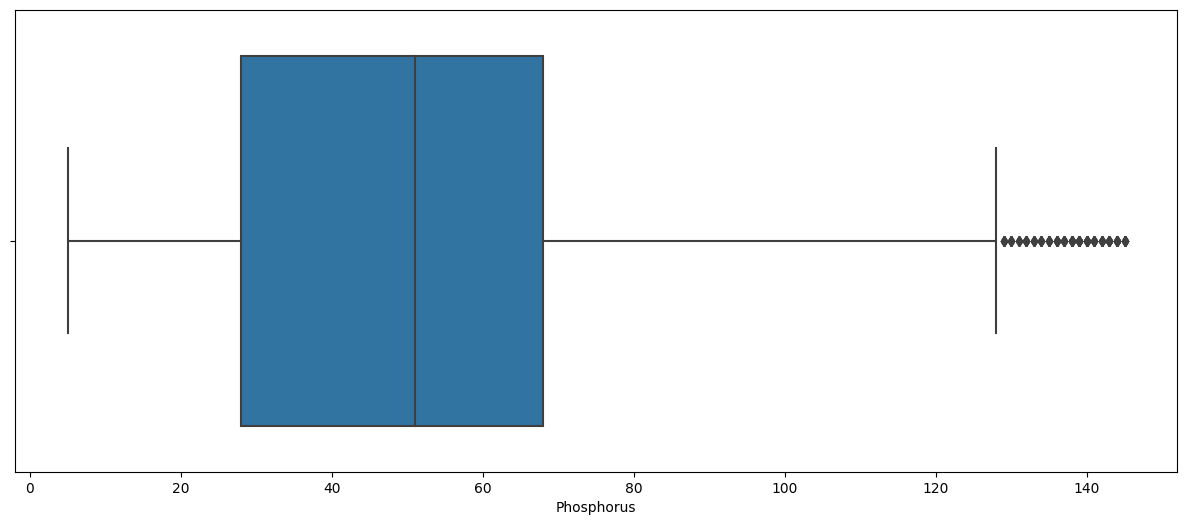

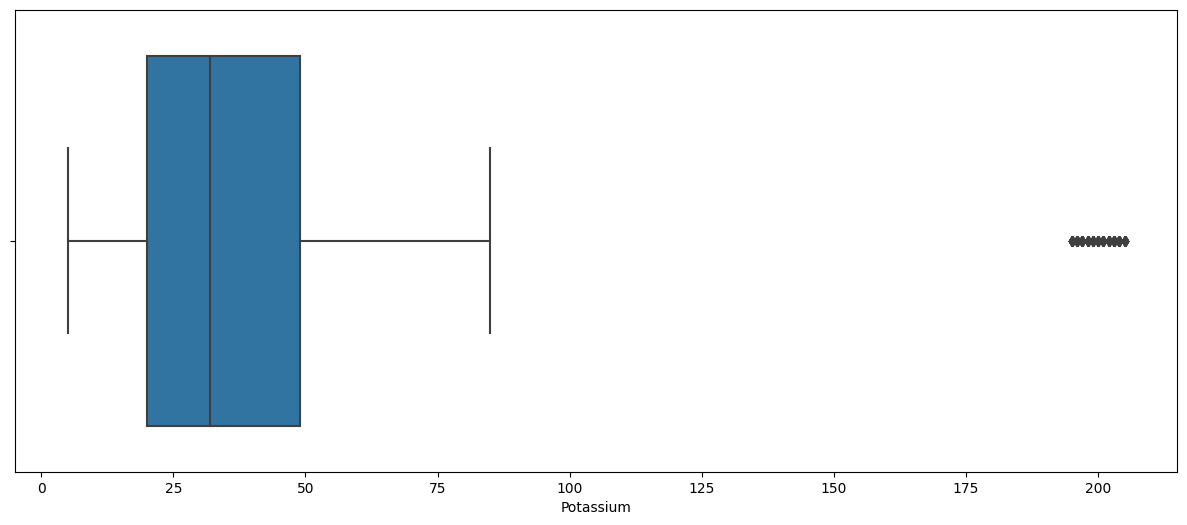

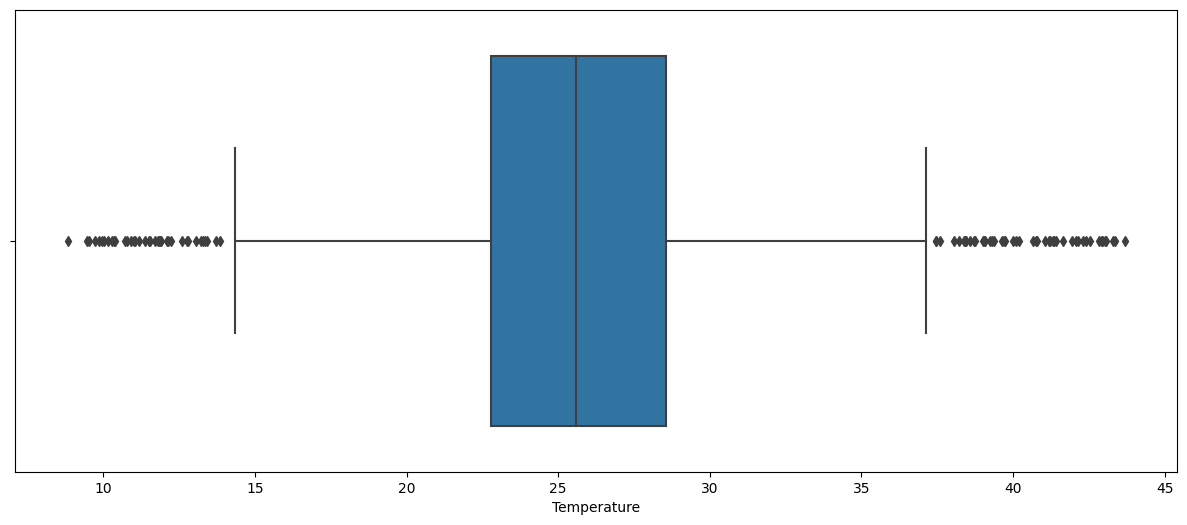

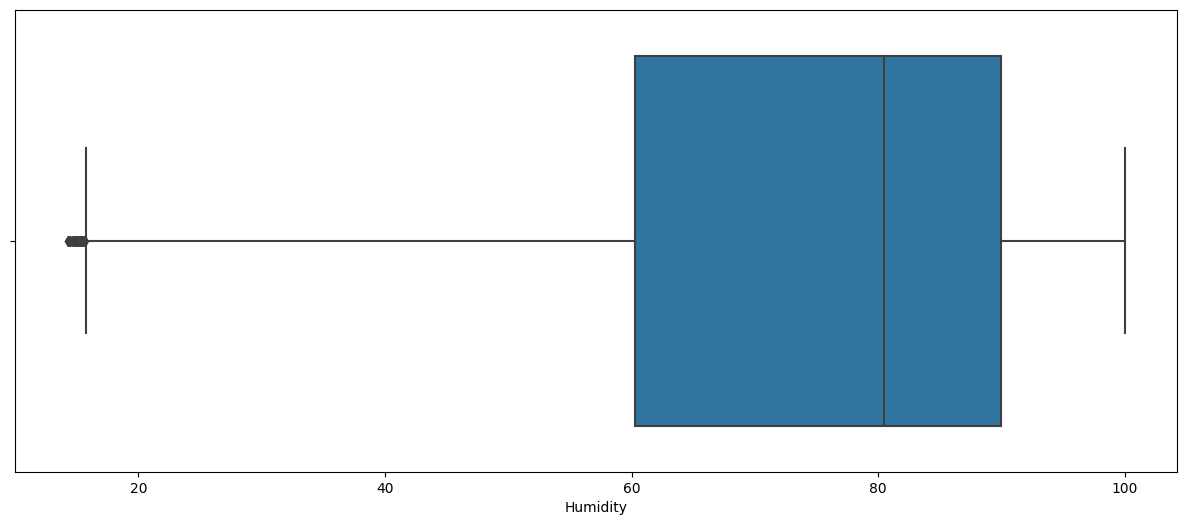

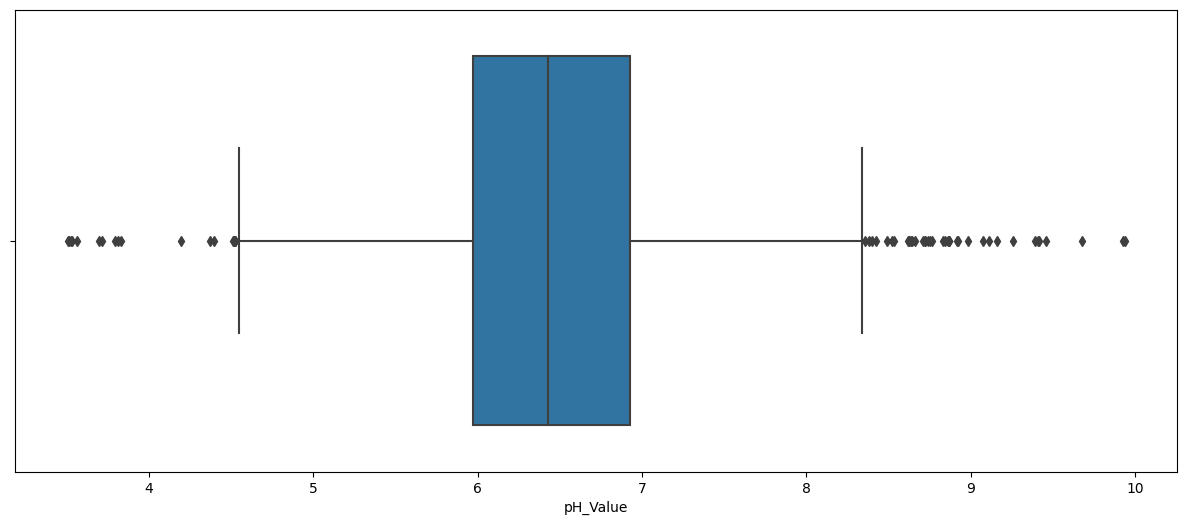

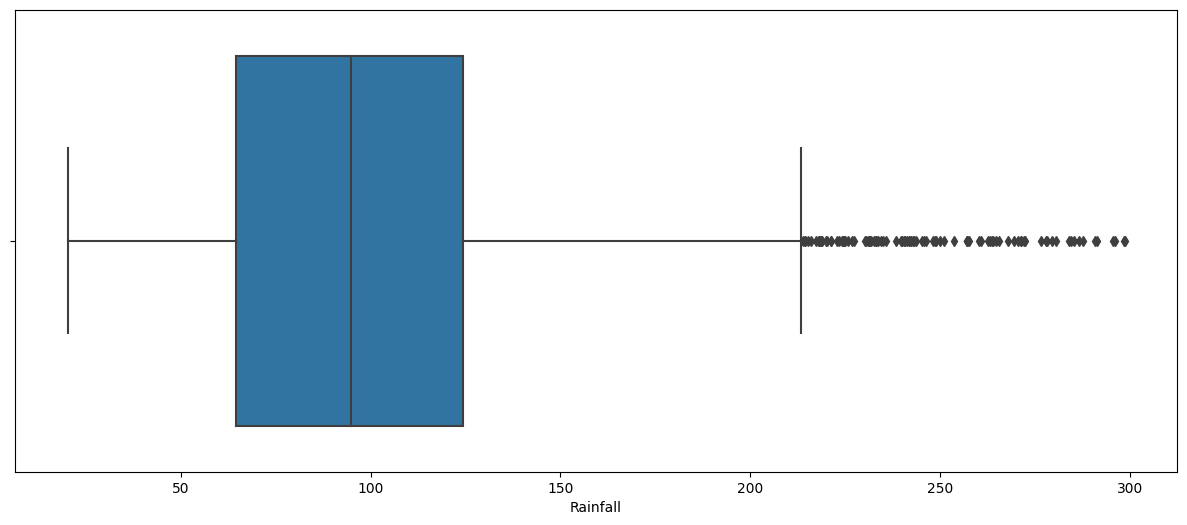

In [19]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=df[i])
    plt.show()

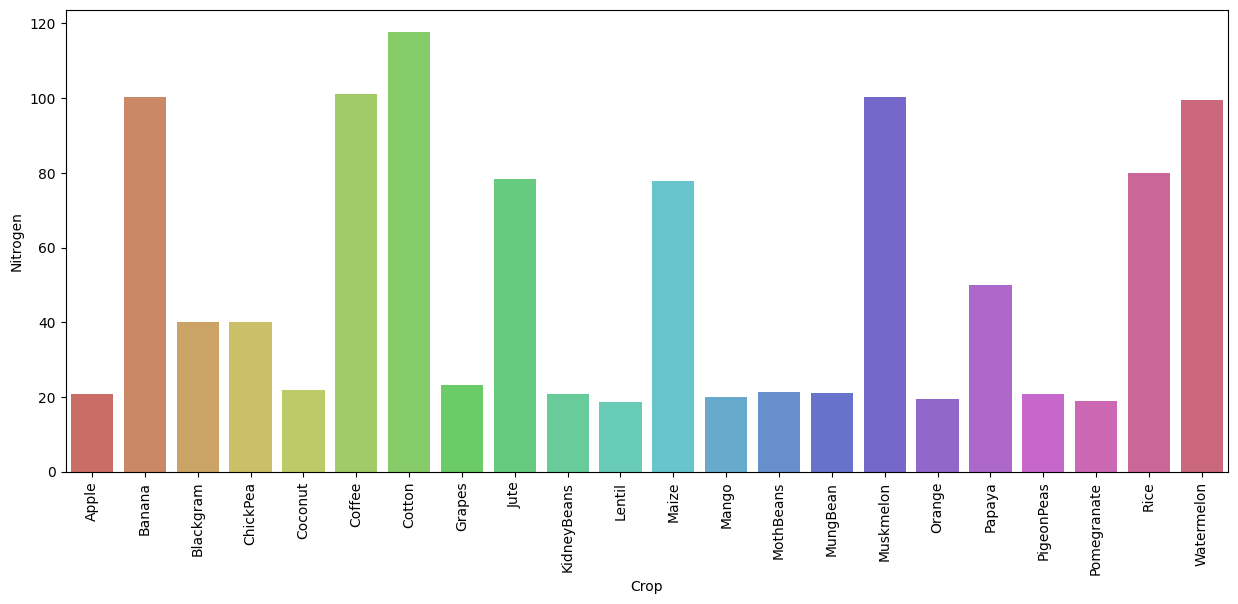

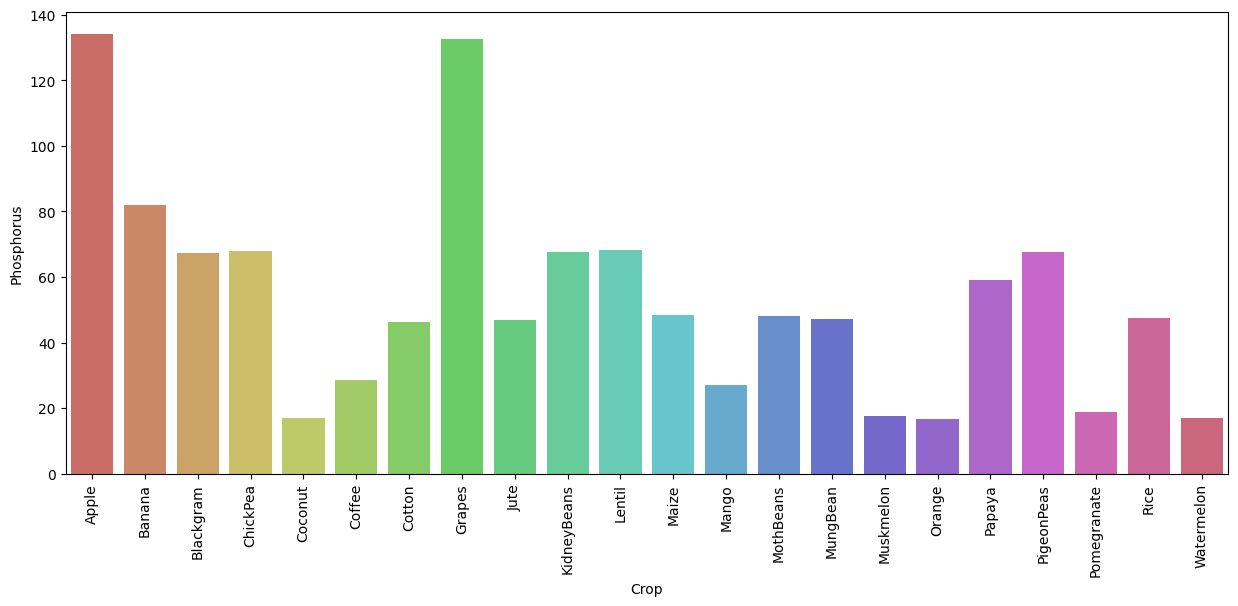

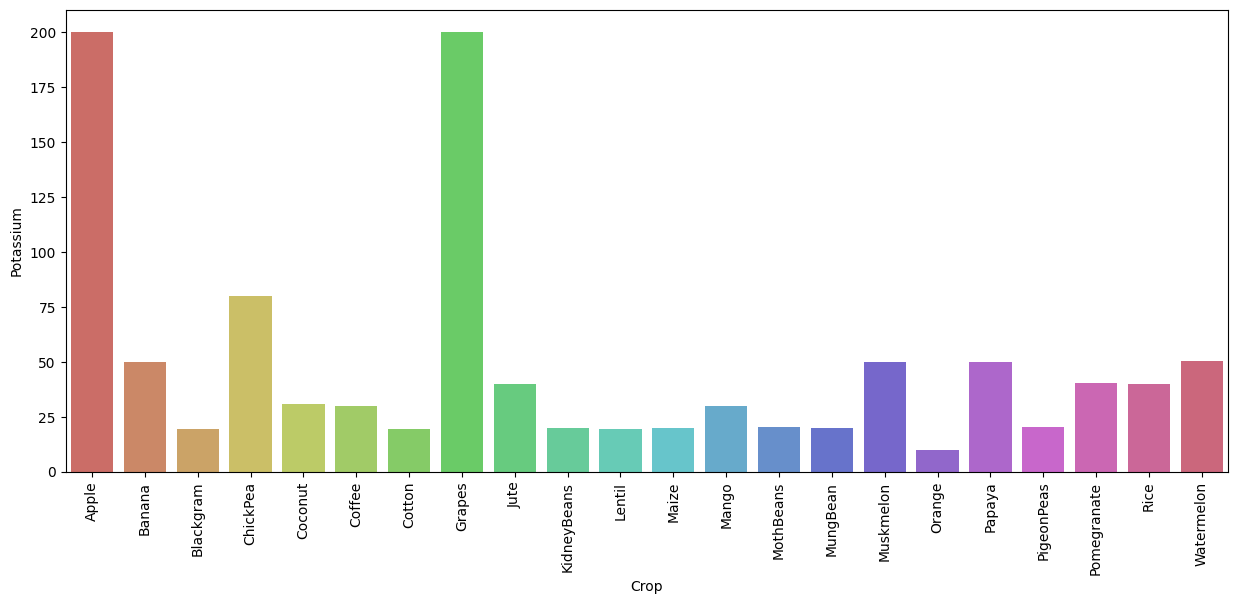

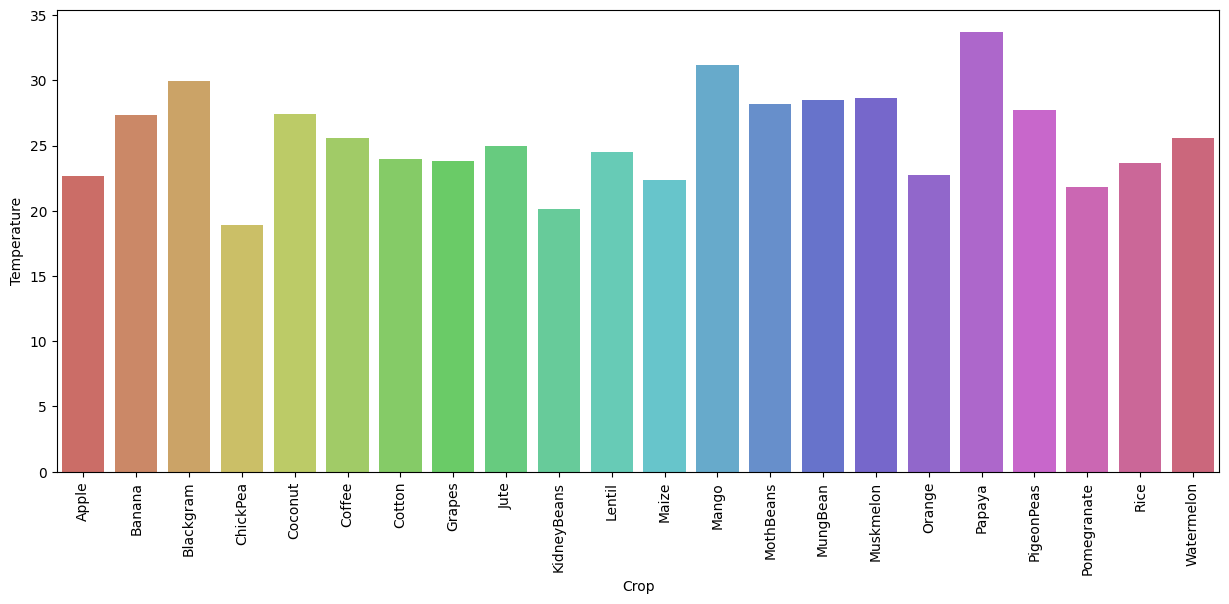

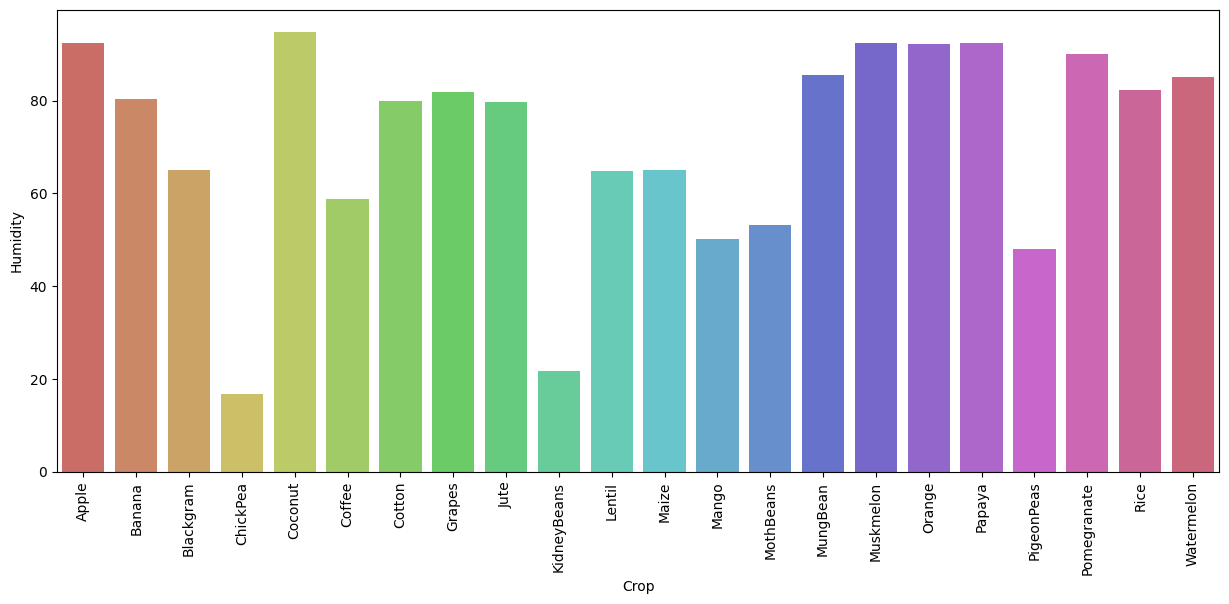

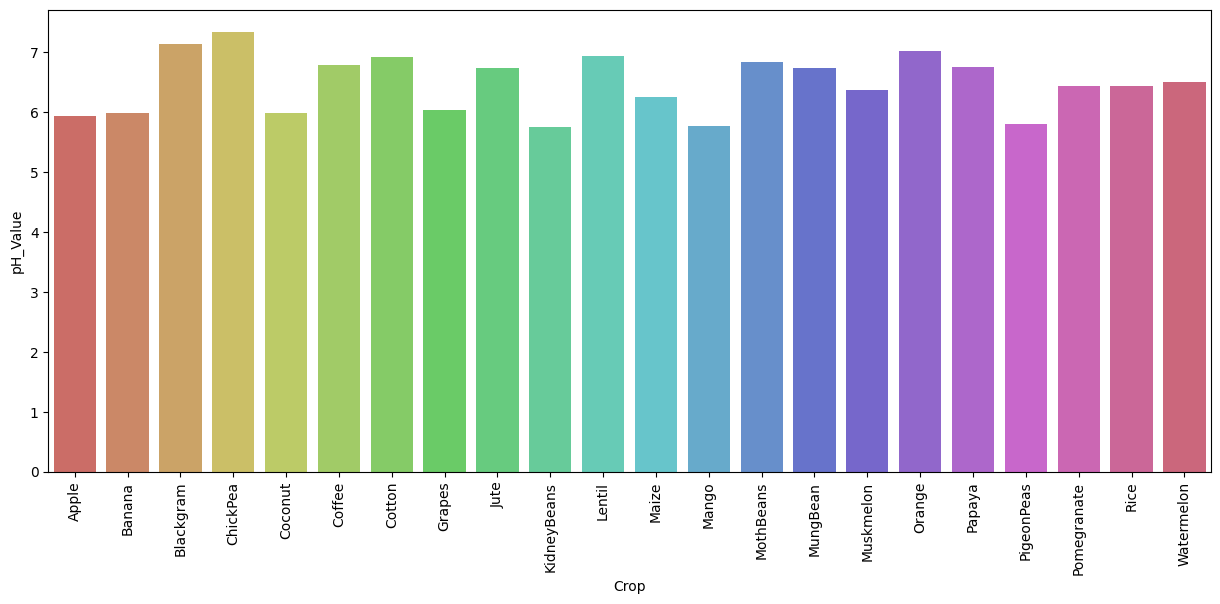

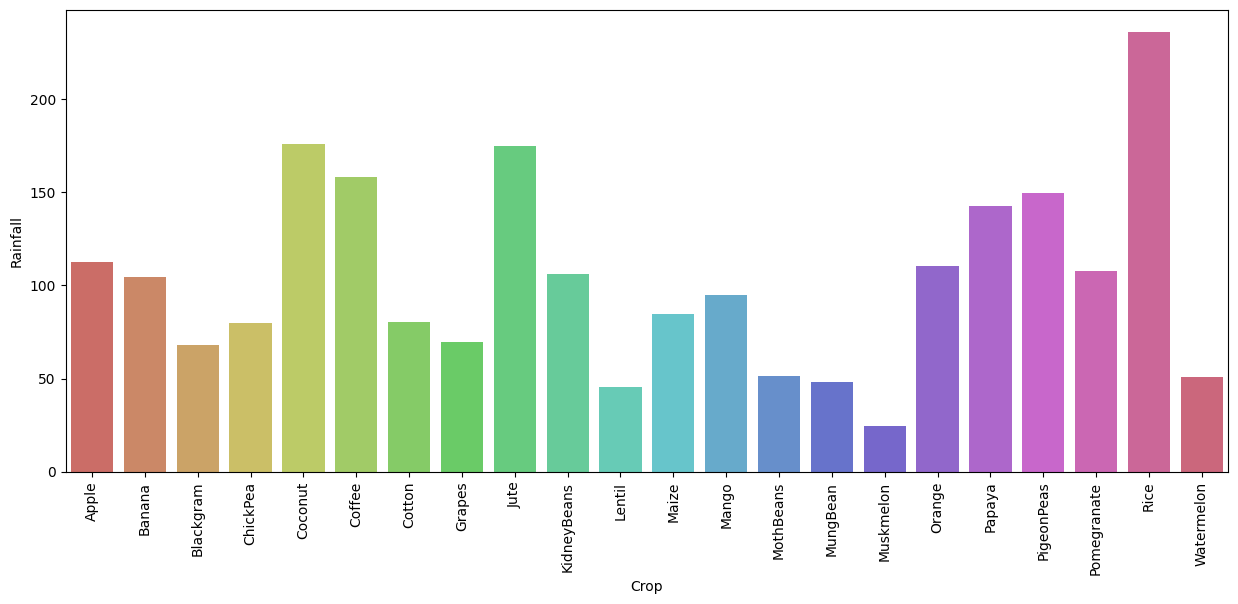

In [20]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.barplot(x='Crop',y=i,data=crop_summary_new,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

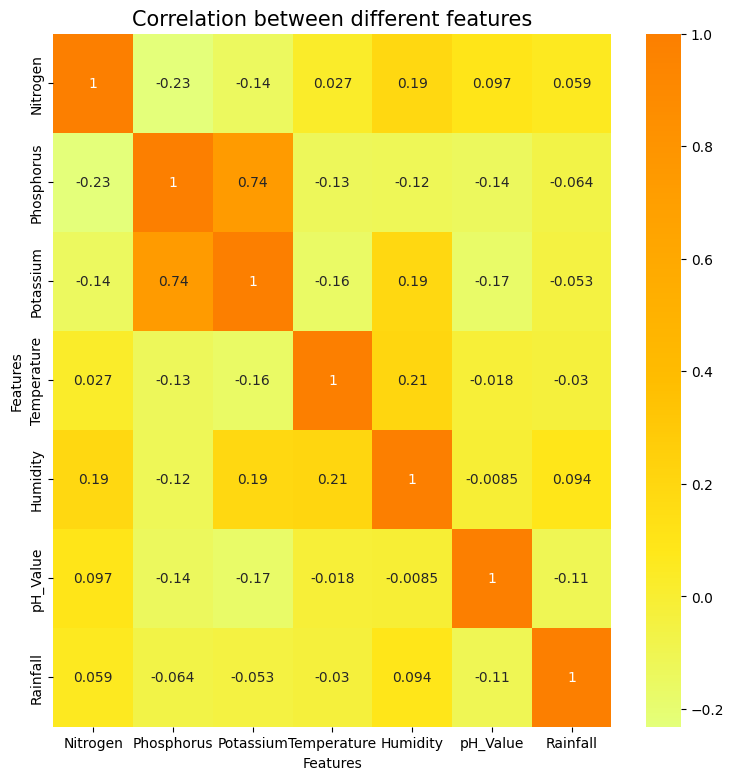

In [21]:
df1.corr()
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.heatmap(df1.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='Features')
ax.set(ylabel='Features')
plt.title('Correlation between different features',fontsize=15,c='black')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Crop']=le.fit_transform(df['Crop'])

In [23]:
df.skew()

Nitrogen        0.509721
Phosphorus      1.010773
Potassium       2.375167
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [24]:
df['Phosphorus']=np.log(df['Phosphorus'])
df['Potassium']=np.log(df['Potassium'])
df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [25]:
df['Humidity']=(df['Humidity'])**2
df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -0.522852
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [26]:
iq1=df['Yield'].quantile(0.25)
iq2=df['Yield'].quantile(0.75)

print(iq1)
print(iq2)
df['Yield']=np.where(df['Yield']<iq1,iq1,df['Yield'])
df['Yield']=np.where(df['Yield']>iq2,iq2,df['Yield'])
df.skew()

950.0
3500.0


Nitrogen       0.509721
Phosphorus    -0.782108
Potassium      0.804010
Temperature    0.184933
Humidity      -0.522852
pH_Value       0.283929
Rainfall       0.965756
Crop           0.000000
Yield          0.283069
dtype: float64

In [27]:
X=df.iloc[:,0:8]
y=df.iloc[:,8]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.linear_model import LinearRegression
regressor_lr=LinearRegression()
regressor_lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred_lr=regressor_lr.predict(X_test)

In [32]:
mse_lr=mean_squared_error(y_pred_lr,y_test)

In [33]:
print("MSE",mse_lr)

MSE 1033830.4702856543


In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt=DecisionTreeRegressor()
regressor_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred_dt=regressor_dt.predict(X_test)

In [38]:
mse_dt=mean_squared_error(y_pred_dt,y_test)
print("MSE",mse_dt)

MSE 1815245.2363636363


In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()

In [40]:
regressor_rf.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
y_pred_rf=regressor_rf.predict(X_test)

In [42]:
mse_rf=mean_squared_error(y_pred_rf,y_test)

In [43]:
print('MSE',mse_rf)

MSE 1024672.9195386363


In [44]:
from sklearn.svm import SVR

In [45]:
regressor_svr=SVR()

In [46]:
regressor_svr.fit(X_train,y_train)

SVR()

In [47]:
y_pred_svr=regressor_svr.predict(X_test)

In [48]:
mse_svr=mean_squared_error(y_pred_svr,y_test)

In [49]:
print('MSE',mse_svr)

MSE 1147891.0975545463


In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
regressor_knn=KNeighborsRegressor()
regressor_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [52]:
y_pred_knn=regressor_knn.predict(X_test)

In [54]:
mse_knn=mean_squared_error(y_pred_knn,y_test)

In [55]:
print("MSE",mse_knn)

MSE 1245810.3739090909


In [56]:
mse_scores=[mse_lr,mse_dt,mse_rf,mse_svr,mse_knn]

In [57]:
algorithm_labels=['Linear Regression','Decision Tree','Random Froest','SVR','KNN']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


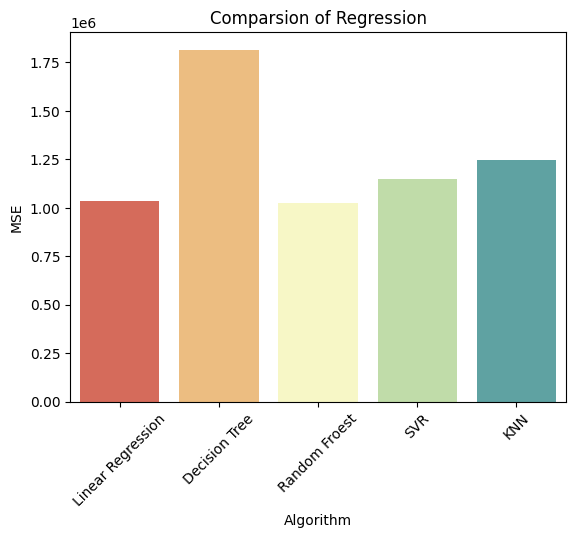

In [59]:
sns.barplot(x=algorithm_labels,y=mse_scores,palette='Spectral')
plt.xlabel('Algorithm')
plt.ylabel('MSE')
plt.title('Comparsion of Regression')
plt.xticks(rotation=45)
plt.show()